## CA_2_SUL LAB HACKATHON
### AMCS,PSG TECH

### *19PD05 (ALAGU PRAKALYA)*

### IMPORTING THE NECESSARY LIBRARIES :

In [43]:
pip install mne

Note: you may need to restart the kernel to use updated packages.


In [90]:
from sklearn import svm
import numpy as np
import pandas as pd
import scipy.io
import cv2
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split

from itertools import chain
from sklearn.feature_selection import mutual_info_classif as MIC
import mne

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### **GETTING THE DATA AND VECTORIZING THEM**

In [86]:
df = pd.read_csv('data.csv')
df=df.drop(['index'], axis = 1)
df.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19,Class
0,-301.0,-794.0,-94.0,-266.0,-315.0,-167.0,-315.0,-20.0,825.0,-20.0,52.0,-167.0,52.0,-20.0,52.0,200.0,50.0,-55.0,50.0,ADHD
1,-55.0,-583.0,89.0,50.0,-20.0,16.0,16.0,236.0,-756.0,163.0,236.0,-57.0,200.0,52.0,16.0,236.0,-195.0,-90.0,121.0,ADHD
2,-160.0,-547.0,16.0,-55.0,-94.0,-57.0,89.0,126.0,-57.0,52.0,89.0,-20.0,52.0,16.0,52.0,126.0,85.0,85.0,191.0,ADHD
3,-266.0,-512.0,-20.0,-19.0,-131.0,-57.0,89.0,200.0,678.0,163.0,200.0,16.0,200.0,52.0,52.0,126.0,-19.0,85.0,156.0,ADHD
4,-19.0,-301.0,236.0,226.0,200.0,126.0,420.0,347.0,-830.0,236.0,200.0,52.0,236.0,163.0,89.0,126.0,-19.0,85.0,156.0,ADHD


In [10]:
df.shape

(2166383, 20)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166383 entries, 0 to 2166382
Data columns (total 20 columns):
 #   Column  Dtype  
---  ------  -----  
 0   E1      float64
 1   E2      float64
 2   E3      float64
 3   E4      float64
 4   E5      float64
 5   E6      float64
 6   E7      float64
 7   E8      float64
 8   E9      float64
 9   E10     float64
 10  E11     float64
 11  E12     float64
 12  E13     float64
 13  E14     float64
 14  E15     float64
 15  E16     float64
 16  E17     float64
 17  E18     float64
 18  E19     float64
 19  Class   object 
dtypes: float64(19), object(1)
memory usage: 330.6+ MB


In [12]:
df.describe()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19
count,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06,2.166383e+06
mean,1.360903e+02,1.361619e+02,1.422117e+02,1.361022e+02,1.422737e+02,1.422005e+02,1.422755e+02,1.419608e+02,1.419823e+02,1.416007e+02,1.420600e+02,1.415633e+02,1.417452e+02,1.413199e+02,1.416635e+02,1.410618e+02,1.352097e+02,1.351830e+02,1.352074e+02
std,2.755497e+02,2.755136e+02,2.206503e+02,2.133873e+02,2.234852e+02,2.107195e+02,2.301860e+02,2.095699e+02,2.360460e+02,2.133996e+02,2.432087e+02,2.265186e+02,2.272337e+02,2.273205e+02,2.079590e+02,2.048027e+02,2.522447e+02,2.130295e+02,2.274500e+02
min,-3.786000e+03,-1.322400e+04,-3.921000e+03,-1.323700e+04,-3.921000e+03,-3.921000e+03,-3.921000e+03,-3.958000e+03,-3.995000e+03,-3.921000e+03,-3.995000e+03,-3.958000e+03,-3.958000e+03,-3.995000e+03,-3.921000e+03,-3.958000e+03,-3.786000e+03,-3.751000e+03,-3.751000e+03
25%,1.500000e+01,1.500000e+01,5.200000e+01,1.500000e+01,5.200000e+01,5.200000e+01,1.600000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,1.500000e+01,1.500000e+01,1.500000e+01
50%,1.210000e+02,1.210000e+02,1.260000e+02,1.210000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.210000e+02,1.210000e+02,1.210000e+02
75%,2.610000e+02,2.260000e+02,2.360000e+02,2.260000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.360000e+02,2.610000e+02,2.260000e+02,2.260000e+02
max,1.381300e+04,4.802000e+03,5.020000e+03,4.802000e+03,5.430000e+03,5.020000e+03,5.020000e+03,5.020000e+03,5.020000e+03,5.020000e+03,5.020000e+03,5.020000e+03,5.020000e+03,5.064000e+03,5.016000e+03,5.020000e+03,4.802000e+03,4.802000e+03,4.802000e+03


#### CHECKING FOR NULL-VALUES : WHICH IS NONE AS SHOWN BELOW

<AxesSubplot:>

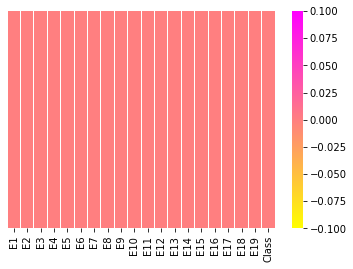

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='spring_r')

#### DISTRIBUTION OF DATA BEFORE NORMALISATION

<AxesSubplot:ylabel='Frequency'>

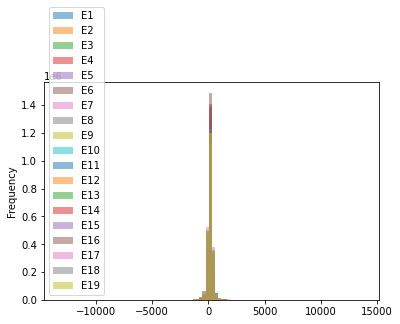

In [22]:
df.plot.hist(bins=100, alpha=0.5)

In [68]:
X=df.iloc[:100,0:19]
Y=df.iloc[:100,19:20]

In [69]:
Y

,Class
0,ADHD
1,ADHD
2,ADHD
3,ADHD
4,ADHD
...,...
95,ADHD
96,ADHD
97,ADHD
98,ADHD


#### MIN-MAX NORMALISATION:

In [70]:
df_target=(X-X.min())/(X.max()-X.min())

#### DISTRIBUTION OF DATA BEFORE NORMALISATION

<AxesSubplot:ylabel='Frequency'>

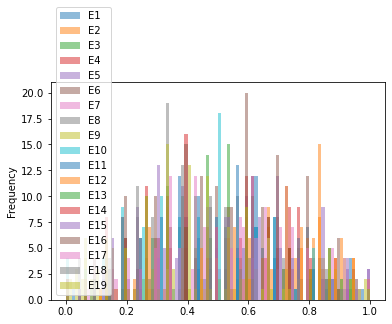

In [71]:
df_target.plot.hist(bins=100, alpha=0.5)

### TEST-PHASE FOR CALCULATING MUTUAL INFORMATION

#### 1.X VS Y
#### 2.CREATION OF d x d MUTUAL INFORMATION ARRAY
#### 3.FINDING THE AVERAGE FOR EACH d array in d x d                               DIMENSION
#### 4.OBTAINED d x 1 VECTOR FOR THE TEST SUBJECT ~ "ADHD"



In [72]:
Y=Y.values.ravel()

In [73]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(df_target,Y)

In [74]:
mi_score

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [76]:
data=df_target

In [ ]:
arr=[]
for i in data:
    temp=MIC(data,data[i].values.ravel()).tolist()
    arr.append(temp)

In [118]:
len(arr)

19

In [115]:
for x in arr:
    print(*x, sep=' ::: ')

3.7658959456121837 ::: 0.5098237393977079 ::: 0.382473987034607 ::: 0.0 ::: 0.1078693357461793 ::: 0.016823429916263954 ::: 0.06837565623504549 ::: 0.12781606336723517 ::: 0.10420368082904563 ::: 0.049347477649535954 ::: 0.3877910597091536 ::: 0.36212847596851816 ::: 0.16031345338164238 ::: 0.0 ::: 0.20748543941402753 ::: 0.013930681284713309 ::: 0.0 ::: 0.05801254023864866 ::: 0.0
0.5960920747799521 ::: 3.464645303492491 ::: 0.3055725889886416 ::: 0.21964231228100006 ::: 0.21834899804847563 ::: 0.014051822740691389 ::: 0.21476960867288675 ::: 0.02697752780850715 ::: 0.04638156387284509 ::: 0.0 ::: 0.2463274575281975 ::: 0.3099848301428274 ::: 0.025493247433208133 ::: 0.020404992436101832 ::: 0.07470994091575855 ::: 0.0 ::: 0.05676031405262805 ::: 0.039099406222958155 ::: 0.05470532192461386
0.45121440887812136 ::: 0.5037519247733595 ::: 3.366074006336109 ::: 0.5597655467982716 ::: 0.2845654349617983 ::: 0.09543172881285145 ::: 0.050144504317563676 ::: 0.12411009544813512 ::: 0.1184855

In [120]:
avg_mi=[]
temp=0

for i in range(0,19):
    for j in range(0,19):
            temp= temp+arr[i][j]
    avg_mi.append(temp/19)

In [122]:
len(avg_mi)

19

In [123]:
avg_mi

[0.33275215609392145,
 0.64506622511191,
 1.0226661952195588,
 1.3796339468096506,
 1.7497737997672347,
 2.055602751052468,
 2.3039840841722596,
 2.5728858999952955,
 2.970772180369006,
 3.2255753745565756,
 3.5827085310461446,
 3.850980881819464,
 4.168509800045596,
 4.4385991914419325,
 4.648483078575008,
 4.904505498477466,
 5.150625253751154,
 5.346157350562262,
 5.563502830987751]

### DISTRIBUTION OF AVERAGE MUTUAL INFORMATION COST OVER THE TEST SUBJECT ~ "ADHD"

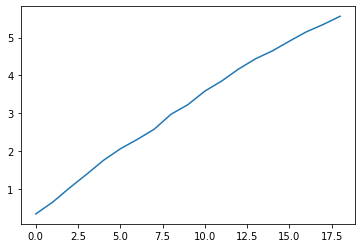

In [125]:
plt.plot(avg_mi)
plt.show()

#### BESIDES FINDING THE TEST FUNTION OVER MUTUAL INFORMATION, NOW THE DATA i.e., ADHD_PART1,ADHD_PART2,CONTROL_PART,CONTROL_PART2 , THE .mat FILES ARE LOADEAD CND CONVERTED TO DATA  FRAME WITH MINIMUM NUMBER OF CONSTRAINTS

In [2]:
info = []
def create_data(Path):
    for root, __, files in os.walk(Path):
        for f in files:
            if f.endswith(".mat"):
                  info.append(scipy.io.loadmat(os.path.join(root, f)))

In [3]:
path1 = 'C:/Users/kpdla/Desktop/Untitled Folder/ADHD_part1'
path2 = 'C:/Users/kpdla/Desktop/Untitled Folder/ADHD_part2'
path3 = 'C:/Users/kpdla/Desktop/Untitled Folder/Control_part1'
path4 = 'C:/Users/kpdla/Desktop/Untitled Folder/Control_part2'
create_data(path1)
create_data(path2)
create_data(path3)
create_data(path4)

In [4]:
array = []
row_size = []
for i in range(len(info)):
    info[i] = dict(info[i])
    key = info[i].keys()
    key = list(key)
    row_size.append(len(info[i][key[3]]))
    min_row = min(row_size)
for i in range(len(info)):
    info[i] = dict(info[i])
    key = info[i].keys()
    key = list(key)
    array.append(info[i][key[3]])
    array[i] = array[i][0:min_row]
    #array[i] = np.average(array[i], axis = 0)

#### NOW WE OBTAIN AN ARRAY OF LEN ! 121*7983

In [5]:
len(array)

121

In [6]:
len(array[100])

7983

#### TEST-DATAFRAME

In [93]:
df1 = pd.DataFrame(array[0], columns =['E1', 'E2', 'E3','E4', 'E5', 'E6','E7', 'E8', 'E9','E10', 'E11', 'E12','E13', 'E14', 'E15','E16', 'E17', 'E18','E19'])
df2 = pd.DataFrame(array[1], columns =['E1', 'E2', 'E3','E4', 'E5', 'E6','E7', 'E8', 'E9','E10', 'E11', 'E12','E13', 'E14', 'E15','E16', 'E17', 'E18','E19'])
df3 = pd.DataFrame(array[2], columns =['E1', 'E2', 'E3','E4', 'E5', 'E6','E7', 'E8', 'E9','E10', 'E11', 'E12','E13', 'E14', 'E15','E16', 'E17', 'E18','E19'])
df4 = pd.DataFrame(array[3], columns =['E1', 'E2', 'E3','E4', 'E5', 'E6','E7', 'E8', 'E9','E10', 'E11', 'E12','E13', 'E14', 'E15','E16', 'E17', 'E18','E19'])

In [94]:
df1.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19
0,261.0,402.0,16.0,261.0,126.0,384.0,126.0,236.0,52.0,236.0,200.0,16.0,200.0,494.0,126.0,236.0,121.0,367.0,121.0
1,121.0,191.0,-94.0,85.0,16.0,200.0,126.0,52.0,347.0,273.0,16.0,-57.0,126.0,347.0,52.0,52.0,15.0,121.0,-19.0
2,-55.0,85.0,-204.0,15.0,-57.0,200.0,52.0,126.0,236.0,200.0,-20.0,-94.0,126.0,420.0,52.0,126.0,-55.0,261.0,85.0
3,191.0,85.0,52.0,50.0,89.0,236.0,163.0,89.0,89.0,89.0,89.0,-57.0,236.0,420.0,126.0,126.0,15.0,85.0,-55.0
4,-55.0,-125.0,-204.0,-160.0,-204.0,16.0,-241.0,-241.0,89.0,16.0,-20.0,-131.0,89.0,310.0,-57.0,52.0,-55.0,15.0,-336.0


In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7983 entries, 0 to 7982
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   E1      7983 non-null   float64
 1   E2      7983 non-null   float64
 2   E3      7983 non-null   float64
 3   E4      7983 non-null   float64
 4   E5      7983 non-null   float64
 5   E6      7983 non-null   float64
 6   E7      7983 non-null   float64
 7   E8      7983 non-null   float64
 8   E9      7983 non-null   float64
 9   E10     7983 non-null   float64
 10  E11     7983 non-null   float64
 11  E12     7983 non-null   float64
 12  E13     7983 non-null   float64
 13  E14     7983 non-null   float64
 14  E15     7983 non-null   float64
 15  E16     7983 non-null   float64
 16  E17     7983 non-null   float64
 17  E18     7983 non-null   float64
 18  E19     7983 non-null   float64
dtypes: float64(19)
memory usage: 1.2 MB


In [23]:
df1.describe()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19
count,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000
mean,146.442440,146.491920,150.885131,144.549793,151.444444,151.316923,151.020544,150.319053,151.362270,150.666667,151.057247,150.324565,151.059877,151.484154,150.957409,150.239384,144.692346,144.703370,144.429037
std,238.289347,227.980378,182.242124,166.796468,196.397034,158.416677,184.865565,185.250143,137.431491,126.076374,184.116687,151.558577,135.546804,153.879106,121.232922,131.651006,163.147457,154.071638,160.552739
min,-1111.000000,-1287.000000,-535.000000,-547.000000,-2208.000000,-535.000000,-572.000000,-1235.000000,-719.000000,-462.000000,-719.000000,-1014.000000,-535.000000,-1235.000000,-719.000000,-756.000000,-1181.000000,-512.000000,-583.000000
25%,50.000000,50.000000,16.000000,50.000000,16.000000,52.000000,16.000000,52.000000,52.000000,89.000000,52.000000,89.000000,52.000000,52.000000,89.000000,89.000000,50.000000,50.000000,50.000000
50%,156.000000,156.000000,163.000000,156.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,156.000000,156.000000,156.000000
75%,261.000000,226.000000,273.000000,261.000000,273.000000,273.000000,273.000000,273.000000,236.000000,236.000000,273.000000,236.000000,236.000000,236.000000,236.000000,236.000000,226.000000,261.000000,261.000000
max,1986.000000,4802.000000,1377.000000,930.000000,1414.000000,862.000000,1377.000000,972.000000,1193.000000,715.000000,1304.000000,899.000000,1304.000000,1451.000000,1267.000000,1046.000000,1388.000000,789.000000,1247.000000


#### NO NULL VALUES:

<AxesSubplot:>

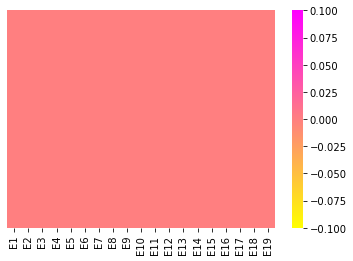

In [26]:
sns.heatmap(df1.isnull(),yticklabels=False,cmap='spring_r')

<AxesSubplot:ylabel='Frequency'>

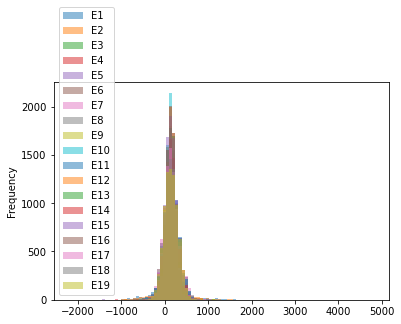

In [27]:
df1.plot.hist(bins=100, alpha=0.5)

In [118]:
X=df1.iloc[:100,0:19]
Y =pd.DataFrame(["ADHD"] * 100)
Y = Y.rename({0: 'Class'}, axis=1)

In [128]:
Y

,Class
0,ADHD
1,ADHD
2,ADHD
3,ADHD
4,ADHD
...,...
95,ADHD
96,ADHD
97,ADHD
98,ADHD


In [ ]:
Y=Y.values.ravel()

In [129]:
df_target=(X-X.min())/(X.max()-X.min())

<AxesSubplot:ylabel='Frequency'>

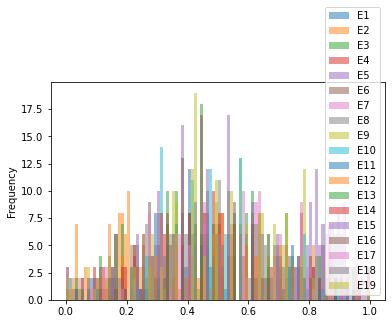

In [30]:
df_target.plot.hist(bins=100, alpha=0.5)

In [131]:
mi_score = MIC(df_target,Y)

In [100]:
df_target.shape

(100, 19)

In [132]:
mi_score

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [152]:
lab_enc = preprocessing.LabelEncoder()
arr=[]
fin=[]
for i in df_target:
    arr=[]
    dat=lab_enc.fit_transform(df_target[i])
    for j in df_target:
        if i!='Class' and i!=j:
            data = lab_enc.fit_transform(df_target[j])
            temp=MIC(dat.reshape(-1,1),data)
            arr.append(temp)
    fin.append(arr)

In [153]:
avg_mi=[]
temp=0

for i in range (0,len(fin)):
    for j in range(0,len(fin[i])):
        temp= temp+fin[i][j]
    avg_mi.append(temp/18)
avg_mi=list(chain.from_iterable(avg_mi))

In [159]:
avg_mi

[0.1662696938681435,
 0.3420228046726931,
 0.5405516491824194,
 0.7044472350686116,
 0.9283586266949606,
 1.0811577769228886,
 1.189609660276358,
 1.3385702084146227,
 1.4755634197914513,
 1.6063692386961335,
 1.8043098702459426,
 1.9432810366764766,
 2.1020232848441918,
 2.2250180579727776,
 2.3130460808060818,
 2.4699887929815367,
 2.563226682062989,
 2.633310953949501,
 2.7033098437213936]

#### NOW, SINCE WE WERE ABLE TO FIND THE COST FOR OUR NEWLY LOADED TEST DATA, WE SHALL PROCESS THE CALCULATION OF THE MUTUAL INFORMATION FOR THE WHOLE DATASET, AND THEN Obtain a 19 x 19 VECTOR FOR EACH 121 SUBJECTS , AND IN THE END TAKING AVERAGE WE'LL HAVE 121 X1 MI_VECTORS

In [36]:
fin_mi=[]
for k in range(0,121):#,3
    sm=pd.DataFrame(array[k], columns =['E1', 'E2', 'E3','E4', 'E5', 'E6','E7', 'E8', 'E9','E10', 'E11', 'E12','E13', 'E14', 'E15','E16', 'E17', 'E18','E19'])
    X=sm.iloc[:100,0:19]
    if k < 61:
        Y=pd.DataFrame(["ADHD"] * 100)
    else:
        Y=pd.DataFrame(["Healthy"] * 100)
    Y = Y.rename({0: 'Class'}, axis=1)
    df_target=(X-X.min())/(X.max()-X.min())
    Y=Y.values.ravel()
    
    lab_enc = preprocessing.LabelEncoder()
    arr=[]
    fin=[]
    for i in df_target:
        arr=[]
        dat=lab_enc.fit_transform(df_target[i])
        for j in df_target:
            if i!='Class' and i!=j:
                data = lab_enc.fit_transform(df_target[j])
                temp=MIC(dat.reshape(-1,1),data)
                arr.append(temp)
        fin.append(arr)
    #print(fin)
    avg_mi=[]
    t=0

    for m in range (0,len(fin)):
        for n in range(0,len(fin[m])):
            t= t+fin[m][n]
        avg_mi.append(t/18)
    avg_mi=list(chain.from_iterable(avg_mi))
    #print("idfoijdo",avg_mi)
    if k < 61:
        avg_mi.append("ADHD")
    else:
        avg_mi.append("Healthy")
    fin_mi.append(avg_mi)  
    

##### CONVERSION OF THE AVERAGE_MI 121 x 1 INTO DATAFRAME 

In [38]:
df=pd.DataFrame(fin_mi, columns =['E1', 'E2', 'E3','E4', 'E5', 'E6','E7', 'E8', 'E9','E10', 'E11', 'E12','E13', 'E14', 'E15','E16', 'E17', 'E18','E19','Class'])


In [123]:
df.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19,Class
0,0.383660,0.792919,1.212255,1.622604,2.023129,2.393252,2.568957,2.897339,2.944207,3.175924,3.560960,3.898768,4.267560,4.540978,4.777970,5.199777,5.544439,5.811323,5.977828,ADHD
1,0.367537,0.635953,1.072017,1.259400,1.703897,1.803385,2.219324,2.337071,2.738489,2.858746,3.259902,3.361013,3.729051,3.870780,4.183466,4.279278,4.603571,4.706988,5.029907,ADHD
2,0.412510,0.915957,1.470684,2.010199,2.551719,3.131206,3.475229,3.812570,4.179211,4.608647,5.223149,5.742592,6.140829,6.580417,6.890656,7.239700,7.564449,8.110252,8.417490,ADHD
3,0.132565,0.247688,0.447558,0.568343,0.760527,0.934591,1.118297,1.348199,1.420763,1.561058,1.749635,1.925651,2.067738,2.265763,2.418152,2.536391,2.681950,2.800798,3.032851,ADHD
4,0.250559,0.524315,0.899523,1.181411,1.427477,1.660761,1.903162,2.061360,2.294401,2.438934,2.793944,3.083996,3.396962,3.605953,3.887698,4.052684,4.395086,4.562892,4.742398,ADHD


### TOPOPLOT: RESTRICTED FOR SAMPLE ELECTRODE VALUES

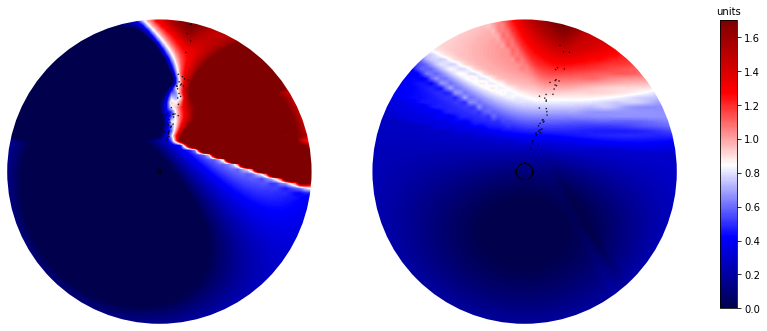

In [87]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=[12,8])


im, cm = mne.viz.plot_topomap(df['E2'], df[['E4', 'E19']].values, axes=ax1, names=df['Class'], show_names=False,  contours=0, show=False, cmap='seismic')
im, cm = mne.viz.plot_topomap(df['E3'], df[['E1', 'E3']].values, axes=ax2, names=df['Class'], show_names=False,  contours=0, show=False, cmap='seismic')

# colorbar
ax_x_start = 0.95
ax_x_width = 0.02
ax_y_start = 0.3
ax_y_height = 0.5
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
clb.ax.set_title("units",fontsize=10)

plt.show()

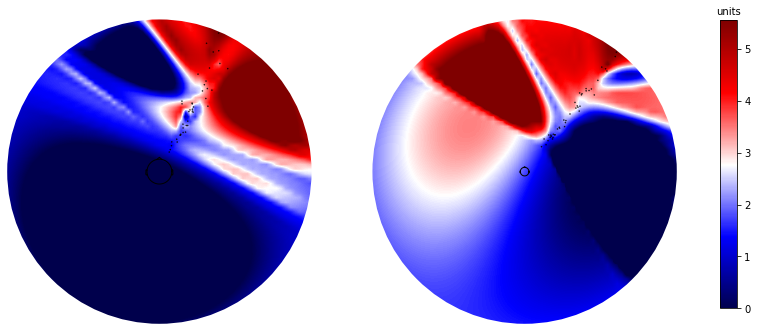

In [128]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=[12,8])


im, cm = mne.viz.plot_topomap(df['E5'], df[['E1', 'E2']].values, axes=ax1, names=df['Class'], show_names=False,  contours=0, show=False, cmap='seismic')
im, cm = mne.viz.plot_topomap(df['E11'], df[['E4', 'E5']].values, axes=ax2, names=df['Class'], show_names=False,  contours=0, show=False, cmap='seismic')

# colorbar
ax_x_start = 0.95
ax_x_width = 0.02
ax_y_start = 0.3
ax_y_height = 0.5
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
clb.ax.set_title("units",fontsize=10)

plt.show()

#### HAVING THE 121 X 1 VECTORS FOR EACH CLASS, TESTING THE OTHER ML_ALGORITHMS FOR ACCURACY

In [220]:
X1=df.iloc[:,0:19]
Y1 =df.iloc[:,19:20]

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.33, random_state=1)

### LOGISTIC REGRESSION

In [96]:
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

        ADHD       0.29      1.00      0.44         4
     Healthy       0.00      0.00      0.00        10

    accuracy                           0.29        14
   macro avg       0.14      0.50      0.22        14
weighted avg       0.08      0.29      0.13        14

[[ 4  0]
 [10  0]]
accuracy is 0.2857142857142857


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 

### KNN (neighbours=8)

In [97]:
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

        ADHD       0.29      1.00      0.44         4
     Healthy       0.00      0.00      0.00        10

    accuracy                           0.29        14
   macro avg       0.14      0.50      0.22        14
weighted avg       0.08      0.29      0.13        14

[[ 4  0]
 [10  0]]
accuracy is 0.2857142857142857


D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being s

### NAIVE BAYES

In [98]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

        ADHD       0.11      0.25      0.15         4
     Healthy       0.40      0.20      0.27        10

    accuracy                           0.21        14
   macro avg       0.26      0.23      0.21        14
weighted avg       0.32      0.21      0.23        14

[[1 3]
 [8 2]]
accuracy is 0.21428571428571427


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### SUPPORT VECTOR MACHINE

In [99]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

        ADHD       0.29      1.00      0.44         4
     Healthy       0.00      0.00      0.00        10

    accuracy                           0.29        14
   macro avg       0.14      0.50      0.22        14
weighted avg       0.08      0.29      0.13        14

[[ 4  0]
 [10  0]]
accuracy is 0.2857142857142857


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 

### DECISION TREE

In [100]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

        ADHD       0.23      0.75      0.35         4
     Healthy       0.00      0.00      0.00        10

    accuracy                           0.21        14
   macro avg       0.12      0.38      0.18        14
weighted avg       0.07      0.21      0.10        14

[[ 3  1]
 [10  0]]
accuracy is 0.21428571428571427


#### SINCE THE ACCURACY OF ANY TRAINED ALGORITHM WAS 0.2XXXX, WE WILL PERFORM PCA, FIND THE BEST-FIT FOR THE MUTUAL INFORMATION DATA WE HAVE FOR EACH CLASS

In [216]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X_train)
X

array([[-0.75448457, -0.90424216, -0.61258538, -0.74647864, -0.8406553 ,
        -0.95207398, -0.90794542, -0.88981249, -0.72725959, -0.7634378 ,
        -0.61153462, -0.60271972, -0.51696423, -0.49518485, -0.37352488,
        -0.33669449, -0.35964051, -0.29232515, -0.28295264],
       [-0.79315931, -0.90136185, -1.40468685, -1.10304631, -0.85242093,
        -0.80460052, -0.66548453, -0.63990857, -0.42267056, -0.43421332,
        -0.3606822 , -0.43373282, -0.29981193, -0.29808916, -0.14855763,
        -0.1623444 , -0.24609621, -0.25137383, -0.17367692],
       [-0.63280052,  0.38142364,  0.57816387,  0.86341406,  1.11379762,
         1.19397104,  1.4010581 ,  1.50746793,  1.53797223,  1.60545433,
         1.56116531,  1.54052123,  1.46878756,  1.43774726,  1.53801218,
         1.55113765,  1.36227147,  1.31781105,  1.33867582],
       [ 0.18124849,  0.40889567,  0.65001676,  0.62139423,  0.46873759,
         0.41642638,  0.40199248,  0.30094333,  0.36041069,  0.32407529,
         0.447

### PERFORMING PCA

In [130]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-1.00938575e+00, -7.12388860e-02, -1.07645289e+00,
         1.14989948e+00, -4.92939606e-01, -6.37333369e-01,
        -4.53579322e-01,  8.81571338e-01],
       [ 9.18117728e-01, -2.33286825e-01,  4.01173720e-01,
         1.64031254e-01, -5.37803529e-01,  7.64429463e-01,
         4.33191577e-01, -1.15004054e-01],
       [ 4.82989285e-01,  2.09436661e+00, -8.34435328e-01,
        -1.44996097e+00,  2.73425783e-02,  1.87142682e-03,
         1.01997930e-01,  1.08448881e-01],
       [-1.96580229e+00,  6.58597885e-02, -1.15837744e+00,
        -2.18270219e+00,  1.04870679e+00, -1.69805312e+00,
         3.63385199e-02, -7.41013549e-01],
       [-3.61920564e-01, -1.57600776e+00, -1.19023856e+00,
        -5.91058670e-01, -1.23335303e-01,  6.88482176e-01,
         5.44864464e-01, -9.92393655e-02],
       [-9.43614280e-01, -1.09452887e+00, -1.61869065e-01,
         5.77124461e-02,  5.73248759e-01, -6.02860073e-01,
         3.70998604e-01,  1.18929743e+00],
       [ 2.67668129e-01,  1.900631

#### COVARIENCE- OBTAINED DURING PCA

In [103]:
pca.get_covariance()


array([[1.03846154, 0.92319716, 0.956746  , 0.8981323 , 0.88962242,
        0.84867986, 0.83010808, 0.78820049, 0.7814047 , 0.74003956,
        0.76747808, 0.76055257, 0.77853575, 0.76537162, 0.74588117,
        0.73032847, 0.75167404, 0.74862503, 0.74133286],
       [0.92319716, 1.03846154, 0.9976081 , 0.99764997, 0.96568369,
        0.96479731, 0.93899297, 0.93317445, 0.89775184, 0.8817917 ,
        0.87735137, 0.89776938, 0.88478408, 0.8892685 , 0.85696817,
        0.8568284 , 0.86533807, 0.86677771, 0.8507081 ],
       [0.956746  , 0.9976081 , 1.03846154, 1.01942531, 1.00884409,
        0.98601256, 0.97081015, 0.94372069, 0.92730016, 0.90270121,
        0.9167187 , 0.92085882, 0.92116287, 0.91264516, 0.89112877,
        0.88318975, 0.8970792 , 0.8954849 , 0.88463238],
       [0.8981323 , 0.99764997, 1.01942531, 1.03846154, 1.02432364,
        1.01803856, 0.99613885, 0.97937696, 0.95665742, 0.9400828 ,
        0.94367851, 0.95447262, 0.94767523, 0.94433664, 0.92071744,
        0.918

#### EXPERIENCED COVARIENCE- OBTAINED DURING PCA

In [104]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([9.36108104e-01, 4.48119309e-02, 9.35856834e-03, 4.19800222e-03,
       2.79421780e-03, 1.19868143e-03, 4.65722075e-04, 3.65832061e-04,
       2.08355512e-04, 1.48174788e-04, 1.15650834e-04, 7.60019784e-05,
       5.59646548e-05, 2.59746863e-05, 2.31714739e-05, 1.94548913e-05,
       1.63713196e-05, 7.71650394e-06, 2.10471898e-06])

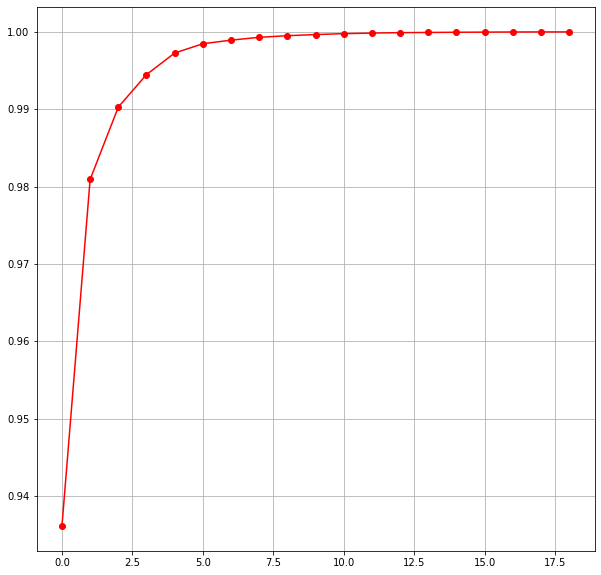

In [108]:
sc_x=StandardScaler()
x = sc_x.fit_transform(X_train)

pca=PCA()
x_pca = pca.fit_transform(x)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [214]:
def classifier(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=accuracy_score(y_pred,y_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    return score*100

### PCA WITH N=3

In [217]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)
X_new

array([[-2.73439345, -0.6817769 ,  0.55412668],
       [-2.35290617, -1.38296748,  0.48966547],
       [ 5.29634012, -1.94988069, -0.84235496],
       [ 2.10888774, -0.11933034,  0.09735745],
       [ 6.80011428, -0.65206416, -0.423471  ],
       [-2.52150053, -0.43130413,  0.16127729],
       [-5.47289856, -0.11210716, -0.50668255],
       [-0.20256008, -0.17047619,  0.68733137],
       [ 2.8394345 , -0.90161063,  0.47847683],
       [ 3.99511058,  0.75255741, -0.37760129],
       [-0.78055819,  0.66766405, -0.13478762],
       [ 0.21733877,  1.74059892,  0.24596113],
       [-4.36537159,  0.27229845, -0.07467999],
       [ 7.67610365,  1.96725503, -0.30733079],
       [-5.11142291,  0.75885648,  0.09725832],
       [-1.18447241, -0.05006678, -0.2340407 ],
       [-4.52883566,  0.70088185,  0.18666643],
       [ 3.95328527,  0.68363036,  0.3737323 ],
       [-2.47662365,  0.54068773, -0.21974414],
       [ 6.80575349,  0.70515241, -0.03601899],
       [-6.16531355,  0.02659895, -0.439

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y_train, test_size = 0.2, random_state = 1)


In [219]:
print("LOGISTIC REGRESSION :",classifier(LogisticRegression()))
print("KNN (N=4):",classifier(KNeighborsClassifier(n_neighbors=4))) 
print("RANDOM FOREST (100) :",classifier(RandomForestClassifier(n_estimators=100)))
print("NAIVE BAYES :",classifier(GaussianNB()))
print("SVC :",classifier(SVC()))




D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with 

              precision    recall  f1-score   support

        ADHD       1.00      0.83      0.91         6
     Healthy       0.00      0.00      0.00         0

    accuracy                           0.83         6
   macro avg       0.50      0.42      0.45         6
weighted avg       1.00      0.83      0.91         6

[[5 1]
 [0 0]]
LOGISTIC REGRESSION : 83.33333333333334
              precision    recall  f1-score   support

        ADHD       1.00      0.67      0.80         6
     Healthy       0.00      0.00      0.00         0

    accuracy                           0.67         6
   macro avg       0.50      0.33      0.40         6
weighted avg       1.00      0.67      0.80         6

[[4 2]
 [0 0]]
KNN (N=4): 66.66666666666666
              precision    recall  f1-score   support

        ADHD       1.00      0.33      0.50         6
     Healthy       0.00      0.00      0.00         0

    accuracy                           0.33         6
   macro avg       0.50      

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when

### PCA WITH N=4

In [222]:
pca_new = PCA(n_components=5)
x_new = pca_new.fit_transform(X_train)

In [223]:
X_train, X_test, y_train, y_test = train_test_split(x_new,y_train, test_size = 0.2, random_state = 1)


In [224]:
print("LOGISTIC REGRESSION :",classifier(LogisticRegression()))
print("KNN (N=4):",classifier(KNeighborsClassifier(n_neighbors=4))) 
print("RANDOM FOREST (100) :",classifier(RandomForestClassifier(n_estimators=100)))
print("NAIVE BAYES :",classifier(GaussianNB()))
print("SVC :",classifier(SVC()))

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with 

              precision    recall  f1-score   support

        ADHD       1.00      0.83      0.91         6
     Healthy       0.00      0.00      0.00         0

    accuracy                           0.83         6
   macro avg       0.50      0.42      0.45         6
weighted avg       1.00      0.83      0.91         6

[[5 1]
 [0 0]]
LOGISTIC REGRESSION : 83.33333333333334
              precision    recall  f1-score   support

        ADHD       1.00      0.67      0.80         6
     Healthy       0.00      0.00      0.00         0

    accuracy                           0.67         6
   macro avg       0.50      0.33      0.40         6
weighted avg       1.00      0.67      0.80         6

[[4 2]
 [0 0]]
KNN (N=4): 66.66666666666666
              precision    recall  f1-score   support

        ADHD       1.00      0.17      0.29         6
     Healthy       0.00      0.00      0.00         0

    accuracy                           0.17         6
   macro avg       0.50      

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when

In [226]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_r2 = lda.fit(X_train, y_train).transform(X_train)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [227]:
X_train, X_test, y_train, y_test = train_test_split(X_r2,y_train, test_size = 0.2, random_state = 1)


In [228]:
print("LOGISTIC REGRESSION :",classifier(LogisticRegression()))
print("KNN (N=4):",classifier(KNeighborsClassifier(n_neighbors=4))) 
print("RANDOM FOREST (100) :",classifier(RandomForestClassifier(n_estimators=100)))
print("NAIVE BAYES :",classifier(GaussianNB()))
print("SVC :",classifier(SVC()))

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` param

              precision    recall  f1-score   support

        ADHD       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

[[6]]
LOGISTIC REGRESSION : 100.0
              precision    recall  f1-score   support

        ADHD       1.00      0.67      0.80         6
     Healthy       0.00      0.00      0.00         0

    accuracy                           0.67         6
   macro avg       0.50      0.33      0.40         6
weighted avg       1.00      0.67      0.80         6

[[4 2]
 [0 0]]
KNN (N=4): 66.66666666666666
              precision    recall  f1-score   support

        ADHD       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

[[6]]
RANDOM FOREST (100) : 100.0
              p

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### PERFORMING PCA, HAD SIGNIFICANTLY IMPROVED RESULT, WHICH FURTHER HAD BEEN DEPLOEYED WITH LDA, (N=1)

#### BEST REULTS HAD BEEN DELIVERED BY LOGISTIC REGRESSION , 0.8XXX , AFTER PCA, FOLLOWED SVC,KNN,RANDOM FOREST,NB. AFTER LDA MOST OF 'EM ACHIEVED 100% ACCURACY